**PROJECT NAME - TITANIC**


**1. Importing Libraries**

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Loading the Titanic dataset**

Load the training and test datasets into pandas DataFrames.

In [279]:
df=pd.read_csv("Downloads/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**3. Exploratory Data Analysis (EDA):**

**Initial Inspection :** View the shape(rows & columns) and dataset information.

In [280]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**4. Check for Missing Values :** Identify columns with missing data.

In [281]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**A bar graph based on the missing value count**

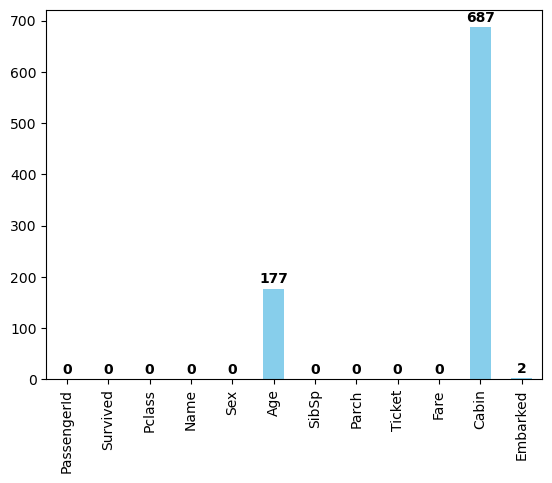

In [282]:
missing=df.isnull().sum()
pl=missing.plot(kind='bar',color='skyblue')
for index,value in enumerate(missing):
    plt.text(index,value+5,str(value),ha='center',va='bottom',fontsize=10,fontweight='bold')
#plt.tight_layout()
plt.show()

**Observation :** The Age and Cabin columns typically have missing values, while Embarked has only a few.

**5. Filling the Age and Embarked columns with appropriate data, and dropping the Cabin column as it has a higher number of missing values.**

In [283]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop("Cabin",axis=1,inplace=True)

In [284]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**6. Checking any duplicated values in each column**

In [285]:
print(df.duplicated().value_counts())

False    891
Name: count, dtype: int64


In [286]:
df['Embarked'].dtypes

dtype('O')

**7. The Total Survival Count**
   

In [287]:
survival=df['Survived'].value_counts()
print(survival)

Survived
0    549
1    342
Name: count, dtype: int64


**A Bar graph representation of Survival Count**

C:\Users\Sheenu\AppData\Local\Temp\ipykernel_11884\2384856242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='pastel')


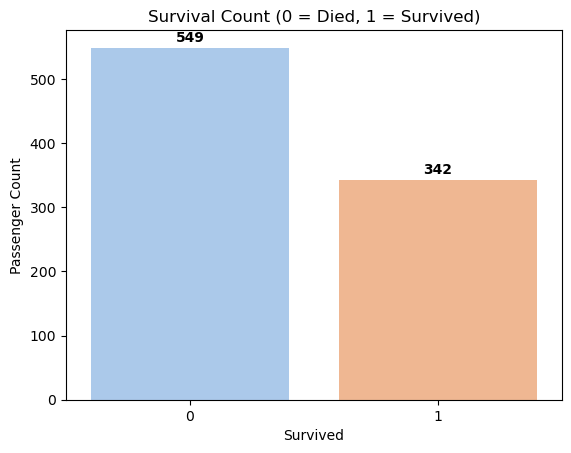

In [288]:
sns.countplot(x='Survived',data=df,palette='pastel')
for index,value in enumerate(survival):
    plt.text(index,value+5,str(value),ha='center',va='bottom',fontsize=10,fontweight='bold')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Passenger Count")
plt.show()

**Observation :** From the above graph it is clear that , 549 people died & 342 people survived

**8. Survived By Gender**


In [289]:
GenderCount=df['Sex'].value_counts()
print(GenderCount)

Sex
male      577
female    314
Name: count, dtype: int64


**Observation :** A Total of 577 males & 314 females are survived

**9. Survival Count based on Gender**

In [290]:
Survivalcount=df.groupby(["Sex","Survived"]).size()
print(Survivalcount)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


**A Bar graph representation of Survival Count Based on Gender**

**size() counts the no:of rows in each group**

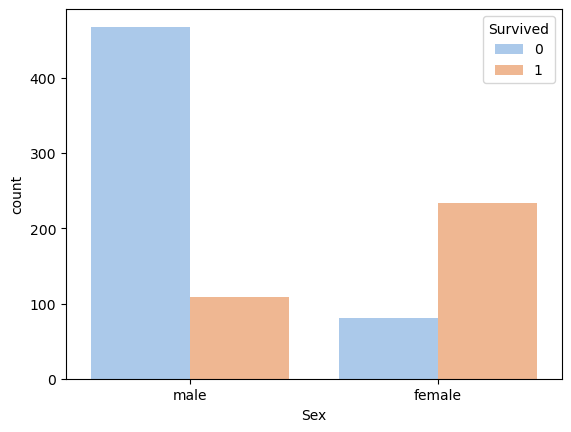

In [291]:
sns.countplot(x="Sex",hue="Survived",data=df,palette='pastel')
plt.show()

**Observation :** This table shows the count of male and female passengers and their survival status. Here, 0 indicates the number of deaths, whereas 1 represents the number of survivors.

From this data, we can see that **109 males and 233 females survived**, while **468 males and 81 females** died.

**10. Passenger Class Distribution**

In [292]:
Passclass=df['Pclass'].value_counts()
print(Passclass)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


**Pie Chart representation of Passenger Class Distribution**

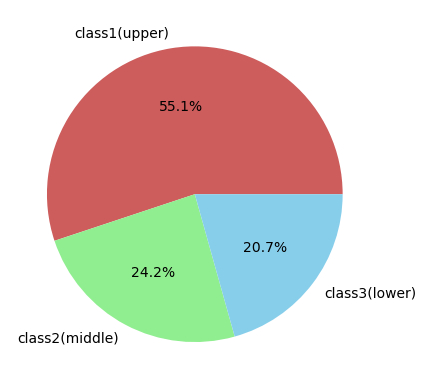

In [293]:
Labels = ['class1(upper)','class2(middle)','class3(lower)']
plt.pie(Passclass,labels=Labels,autopct="%1.1f%%", colors=['indianred','lightgreen','skyblue'])
plt.show()

**Observation :** This shows the passenger class distribution, where 3 represents the lower class, 2 represents the middle class, and 1 represents the upper class.

From this, it is clear that **216 people traveled in the upper class, 184 in the middle class, and 491 in the lower class**.

**11. Age Distribution Using KDE plot (Kernel Distribution Estimate)**

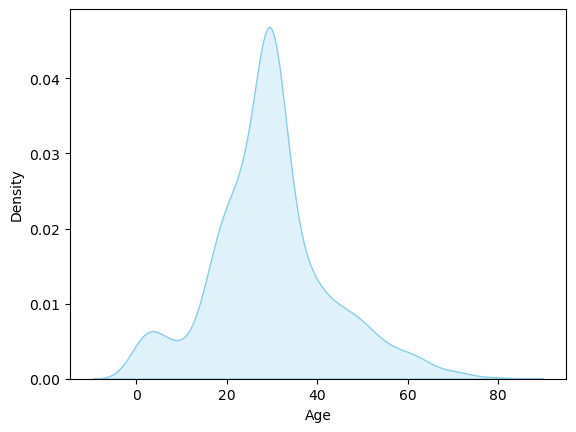

In [294]:
sns.kdeplot(df['Age'],fill='True',color='skyblue')
plt.show()

**Observation :** Most of the passengers who traveled were between **20 and 40 years old.**

**5. Age V/S Survival Count representation using Histogram**

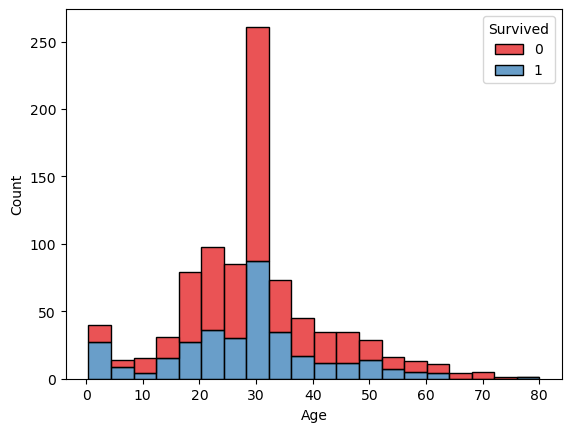

In [295]:
sns.histplot(x="Age",hue="Survived",multiple="stack",data=df,palette="Set1",bins=20)
plt.show()

**Observation :** The age with the highest number of deaths and survivors is 30 years, whereas the lowest counts are among people over 60 years old.

**6. Survival by Age Group**

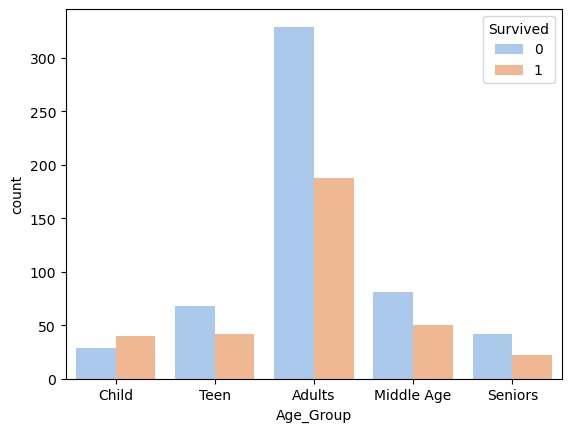

In [296]:
df['Age_Group']=pd.cut(df['Age'],bins=[0,12,20,36,50,100],labels=['Child','Teen','Adults','Middle Age','Seniors'])
sns.countplot(x="Age_Group",hue="Survived",palette="pastel",data=df)
plt.show()

**Observation :** From this graph, it is clear that **adults have the highest death and survival rates**, whereas the **lowest deaths and survivors are in the senior and child categories**, respectively.

**Final Conclusion :** The data shows that more **females survived than males**, and survival varied across passenger classes, with the **majority traveling in the lower class**. Most passengers were aged 20–40, with **30 years being the age with the highest number of deaths and survivors**, while counts were **lowest for those over 60**. Overall, **adults experienced the highest death and survival rates, whereas seniors and children had the lowest**.